In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from scipy import stats
%pylab inline
%matplotlib inline
pd.options.display.max_columns = 100
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Idea for switch def from http://www.pydanny.com/why-doesnt-python-have-switch-case.html
def reverse(x):
    switch = {
        0: 0,
        1: 5,
        2: 4,
        3: 3,
        4: 2,
        5: 1,
    }
    return switch.get(x,99)

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.shape

(19719, 57)

In [5]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,2,5,2,5,1,4,3,5,1,1,5,2,5,1,1,1,1,1,1,1,5,1,5,2,3,1,5,4,5,4,1,5,1,5,1,4,1,4,5,4,1,3,1,5,1,4,2,5,5.000
1,13,46,1,2,1,1,US,2,2,3,3,3,3,1,5,1,5,2,3,4,2,3,4,3,2,2,4,1,3,3,4,4,4,2,3,4,3,4,1,3,2,3,1,5,1,4,4,3,3,3,3,2,3,3,1,3,2.000
2,1,14,2,2,1,1,PK,5,1,1,4,5,1,1,5,5,1,5,1,5,5,5,5,5,5,5,5,5,1,5,5,1,5,1,5,5,5,4,1,5,1,5,1,5,1,5,5,4,5,5,1,5,1,5,5,5,5.000
3,3,19,2,2,1,1,RO,2,5,2,4,3,4,3,4,4,5,5,4,4,2,4,5,5,5,4,5,2,5,4,4,3,5,3,4,4,3,3,3,4,5,1,4,5,4,2,3,4,3,5,2,4,2,5,2,5,5.000
4,11,25,2,2,1,2,US,3,1,3,3,3,1,3,1,3,5,3,3,3,4,3,3,3,3,3,4,5,5,3,5,1,5,1,5,5,5,3,1,5,3,3,1,1,3,3,3,3,1,1,1,3,1,3,1,5,3.000


# EDA and Cleaning

In [6]:
for c in df.columns:
    print c, ' ', df[c].isnull().sum()

race   0
age   0
engnat   0
gender   0
hand   0
source   0
country   8
E1   0
E2   0
E3   0
E4   0
E5   0
E6   0
E7   0
E8   0
E9   0
E10   0
N1   0
N2   0
N3   0
N4   0
N5   0
N6   0
N7   0
N8   0
N9   0
N10   0
A1   0
A2   0
A3   0
A4   0
A5   0
A6   0
A7   0
A8   0
A9   0
A10   0
C1   0
C2   0
C3   0
C4   0
C5   0
C6   0
C7   0
C8   0
C9   0
C10   0
O1   0
O2   0
O3   0
O4   0
O5   0
O6   0
O7   0
O8   0
O9   0
O10   1


In [7]:
df.dropna(inplace=True)

In [8]:
df.hand.value_counts()

1    17415
2     1724
3      471
0      100
dtype: int64

In [9]:
df.engnat.value_counts()

1    12376
2     7264
0       70
dtype: int64

In [10]:
df.gender.value_counts()

2    11977
1     7607
3      102
0       24
dtype: int64

In [11]:
df.race.value_counts()

3     10535
13     2550
11     1861
4      1518
1      1433
5       514
6       397
12      257
8       201
9       188
0       153
10       65
7        24
2        14
dtype: int64

In [12]:
df.age.describe()

count       19710.000
mean        50790.198
std       7122897.597
min            13.000
25%            18.000
50%            22.000
75%            31.000
max     999999999.000
Name: age, dtype: float64

In [13]:
df.country.value_counts()

US     8753
GB     1531
IN     1464
AU      974
CA      924
PH      649
(nu     369
IT      277
MY      247
PK      222
DE      191
ZA      179
BR      175
ID      172
SE      169
NZ      157
NO      147
RO      135
SG      133
NL      133
FR      129
DK      122
IE      107
AE      100
FI       90
PT       88
BE       86
GR       85
RS       85
MX       82
       ... 
NI        2
CM        2
TZ        2
PG        2
HT        2
RW        2
LY        2
LS        2
TC        1
AG        1
GY        1
GP        1
AO        1
AS        1
UZ        1
GD        1
SD        1
BT        1
BF        1
IM        1
CV        1
MR        1
PW        1
KY        1
KZ        1
KG        1
ET        1
FO        1
SR        1
GU        1
dtype: int64

In [14]:
for c in df.columns:
    print c, ' ', sum(df[c] == 0)

race   153
age   0
engnat   70
gender   24
hand   100
source   0
country   0
E1   1
E2   1
E3   1
E4   1
E5   1
E6   1
E7   1
E8   1
E9   1
E10   1
N1   1
N2   1
N3   1
N4   1
N5   1
N6   1
N7   1
N8   1
N9   1
N10   1
A1   1
A2   1
A3   1
A4   1
A5   1
A6   1
A7   1
A8   1
A9   1
A10   1
C1   1
C2   1
C3   1
C4   1
C5   1
C6   1
C7   1
C8   1
C9   1
C10   1
O1   1
O2   1
O3   1
O4   1
O5   1
O6   1
O7   1
O8   1
O9   1
O10   1


In [15]:
for c in df.columns[7:]:
    print c,'\n',df[c].describe(),'\n\n'

E1 
count   19710.000
mean        2.629
std         1.233
min         0.000
25%         2.000
50%         3.000
75%         4.000
max         5.000
Name: E1, dtype: float64 


E2 
count   19710.000
mean        2.760
std         1.314
min         0.000
25%         2.000
50%         3.000
75%         4.000
max         5.000
Name: E2, dtype: float64 


E3 
count   19710.000
mean        3.417
std         1.237
min         0.000
25%         3.000
50%         4.000
75%         4.000
max         5.000
Name: E3, dtype: float64 


E4 
count   19710.000
mean        3.152
std         1.223
min         0.000
25%         2.000
50%         3.000
75%         4.000
max         5.000
Name: E4, dtype: float64 


E5 
count   19710.000
mean        3.432
std         1.282
min         0.000
25%         2.000
50%         4.000
75%         5.000
max         5.000
Name: E5, dtype: float64 


E6 
count   19710.000
mean        2.453
std         1.242
min         0.000
25%         1.000
50%         2.000
75%     

In [16]:
for c in df.columns:
    df = df[df[c] != 0]

In [17]:
for c in df.columns:
    print c, ' ', sum(df[c] == 0)

race   0
age   0
engnat   0
gender   0
hand   0
source   0
country   0
E1   0
E2   0
E3   0
E4   0
E5   0
E6   0
E7   0
E8   0
E9   0
E10   0
N1   0
N2   0
N3   0
N4   0
N5   0
N6   0
N7   0
N8   0
N9   0
N10   0
A1   0
A2   0
A3   0
A4   0
A5   0
A6   0
A7   0
A8   0
A9   0
A10   0
C1   0
C2   0
C3   0
C4   0
C5   0
C6   0
C7   0
C8   0
C9   0
C10   0
O1   0
O2   0
O3   0
O4   0
O5   0
O6   0
O7   0
O8   0
O9   0
O10   0


In [18]:
df.shape

(19375, 57)

In [19]:
countries = pd.unique(df.country.values.ravel())
countries

array(['US', 'PK', 'RO', 'IN', 'IT', 'FR', 'GB', 'LT', 'CA', 'GR', 'DK',
       'MX', 'SE', 'JO', 'NO', 'IE', 'NZ', 'FI', 'BE', 'HR', 'ZA', 'PL',
       'BR', 'SK', 'SA', 'PH', 'AU', 'JP', 'ID', 'MY', 'KW', 'TR', 'SG',
       'IL', 'DE', 'AE', 'BT', 'AR', 'RS', 'GH', 'NL', 'MU', 'KE', '(nu',
       'AT', 'TZ', 'ES', 'HU', 'RU', 'UG', 'PT', 'HK', 'CO', 'CN', 'BH',
       'ME', 'BZ', 'SI', 'CZ', 'CH', 'LK', 'EG', 'TH', 'BG', 'AZ', 'PR',
       'NP', 'FJ', 'CM', 'BD', 'VN', 'LB', 'PW', 'MA', 'IR', 'EE', 'JM',
       'UA', 'MM', 'A1', 'KR', 'CY', 'JE', 'QA', 'OM', 'MK', 'VE', 'IS',
       'NG', 'ZW', 'CR', 'CL', 'SY', 'DO', 'AL', 'SV', 'TT', 'EU', 'BM',
       'HT', 'TW', 'MZ', 'BW', 'BF', 'TN', 'IM', 'BA', 'KZ', 'GG', 'SD',
       'HN', 'GE', 'KH', 'PG', 'MV', 'RW', 'LS', 'PE', 'BB', 'LA', 'BO',
       'VC', 'PA', 'BN', 'AG', 'LV', 'A2', 'MP', 'EC', 'MT', 'GP', 'AS',
       'AP', 'FO', 'NI', 'GU', 'DZ', 'BS', 'SR', 'GY', 'LY', 'IQ', 'GT',
       'VI', 'KY', 'MN', 'ET', 'AO', 'UY', 'MR', '

In [20]:
df.country = df.country.replace('(nu','NU')
df = df[df.country != 'A1']
df = df[df.country != 'A2']

In [21]:
countries = pd.unique(df.country.values.ravel())
countries

array(['US', 'PK', 'RO', 'IN', 'IT', 'FR', 'GB', 'LT', 'CA', 'GR', 'DK',
       'MX', 'SE', 'JO', 'NO', 'IE', 'NZ', 'FI', 'BE', 'HR', 'ZA', 'PL',
       'BR', 'SK', 'SA', 'PH', 'AU', 'JP', 'ID', 'MY', 'KW', 'TR', 'SG',
       'IL', 'DE', 'AE', 'BT', 'AR', 'RS', 'GH', 'NL', 'MU', 'KE', 'NU',
       'AT', 'TZ', 'ES', 'HU', 'RU', 'UG', 'PT', 'HK', 'CO', 'CN', 'BH',
       'ME', 'BZ', 'SI', 'CZ', 'CH', 'LK', 'EG', 'TH', 'BG', 'AZ', 'PR',
       'NP', 'FJ', 'CM', 'BD', 'VN', 'LB', 'PW', 'MA', 'IR', 'EE', 'JM',
       'UA', 'MM', 'KR', 'CY', 'JE', 'QA', 'OM', 'MK', 'VE', 'IS', 'NG',
       'ZW', 'CR', 'CL', 'SY', 'DO', 'AL', 'SV', 'TT', 'EU', 'BM', 'HT',
       'TW', 'MZ', 'BW', 'BF', 'TN', 'IM', 'BA', 'KZ', 'GG', 'SD', 'HN',
       'GE', 'KH', 'PG', 'MV', 'RW', 'LS', 'PE', 'BB', 'LA', 'BO', 'VC',
       'PA', 'BN', 'AG', 'LV', 'MP', 'EC', 'MT', 'GP', 'AS', 'AP', 'FO',
       'NI', 'GU', 'DZ', 'BS', 'SR', 'GY', 'LY', 'IQ', 'GT', 'VI', 'KY',
       'MN', 'ET', 'AO', 'UY', 'MR', 'CV', 'MW', 'Z

In [22]:
age = list(df.age)
new_age = []
for a in age:
    if a > 1000:
        n = 2014-a
    else:
        n = a
    new_age.append(n)

In [23]:
df.drop(['age'],axis=1,inplace=True)
df.insert(1,'age',new_age)

In [24]:
df = df[(df.age > 0) & (df.age < 100)]

In [25]:
rev_score = ['E2','E4','E6','E8','E10','A1','A3','A5','A7','C2',
             'C4','C6','C8','O2','O4','O6']
for q in rev_score:
    df[q] = df[q].apply(reverse)

In [26]:
df.head()

,race,age,engnat,gender,hand,source,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10
0,3,53,1,1,1,1,US,4,4,5,4,5,5,4,3,5,5,1,5,2,5,1,1,1,1,1,1,5,5,5,5,4,3,5,5,4,5,4,5,5,5,5,5,4,5,4,5,4,5,3,5,5,5,4,2,5,5.000
1,13,46,1,2,1,1,US,2,4,3,3,3,3,1,1,1,1,2,3,4,2,3,4,3,2,2,4,5,3,3,4,2,4,4,3,4,3,4,5,3,4,3,5,5,5,4,4,3,3,3,3,2,3,3,1,3,2.000
2,1,14,2,2,1,1,PK,5,5,1,2,5,5,1,1,5,5,5,1,5,5,5,5,5,5,5,5,1,1,1,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,4,1,5,5,5,5,5,5,5,5.000
3,3,19,2,2,1,1,RO,2,1,2,2,3,2,3,2,4,1,5,4,4,2,4,5,5,5,4,5,4,5,2,4,3,5,3,4,4,3,3,3,4,1,1,2,5,2,2,3,4,3,5,4,4,4,5,2,5,5.000
4,11,25,2,2,1,2,US,3,5,3,3,3,5,3,5,3,1,3,3,3,4,3,3,3,3,3,4,1,5,3,5,5,5,5,5,5,5,3,5,5,3,3,5,1,3,3,3,3,5,1,5,3,5,3,1,5,3.000


In [27]:
df_age = df.drop(['race','engnat','gender','hand','country','source'],axis=1)
df_race = df.drop(['age','engnat','gender','hand','country','source'],axis=1)
df_engnat = df.drop(['race','age','gender','hand','country','source'],axis=1)
df_gender = df.drop(['race','engnat','age','hand','country','source'],axis=1)
df_hand = df.drop(['race','engnat','gender','age','country','source'],axis=1)

In [28]:
df.drop(['hand','source','engnat'],axis=1,inplace=True)

In [29]:
E = list(df.columns[4:14])
N = list(df.columns[14:24])
A = list(df.columns[24:34])
C = list(df.columns[34:44])
O = list(df.columns[44:54])

In [30]:
df['tot'] = 0
tmp = pd.DataFrame()
tmp['tot'] = df['tot']
df.drop(['tot'],axis=1,inplace=True)

In [31]:
for e in E:
    tmp['tot'] = tmp['tot'] + df[e]
tmp['perc'] = (tmp['tot']/50)*100
df.insert(14,'E_tot',tmp.tot)
df.insert(15,'E_perc',tmp.perc)
tmp['tot'] = 0

for n in N:
    tmp['tot'] = tmp['tot'] + df[n]
tmp['perc'] = (tmp['tot']/50)*100
df.insert(26,'N_tot',tmp.tot)
df.insert(27,'N_perc',tmp.perc)
tmp['tot'] = 0

for a in A:
    tmp['tot'] = tmp['tot'] + df[a]
tmp['perc'] = (tmp['tot']/50)*100
df.insert(38,'A_tot',tmp.tot)
df.insert(39,'A_perc',tmp.perc)
tmp['tot'] = 0

for c in C:
    tmp['tot'] = tmp['tot'] + df[c]
tmp['perc'] = (tmp['tot']/50)*100
df.insert(50,'C_tot',tmp.tot)
df.insert(51,'C_perc',tmp.perc)
tmp['tot'] = 0

for o in O:
    tmp['tot'] = tmp['tot'] + df[o]
tmp['perc'] = (tmp['tot']/50)*100
df.insert(62,'O_tot',tmp.tot)
df.insert(63,'O_perc',tmp.perc)

tmp['tot'] = 0
tmp['perc'] = 0

In [32]:
df.head()

,race,age,gender,country,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E_tot,E_perc,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,N_tot,N_perc,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A_tot,A_perc,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C_tot,C_perc,O1,O2,O3,O4,O5,O6,O7,O8,O9,O10,O_tot,O_perc
0,3,53,1,US,4,4,5,4,5,5,4,3,5,5,44,88.000,1,5,2,5,1,1,1,1,1,1,19,38.000,5,5,5,5,4,3,5,5,4,5,46,92.000,4,5,5,5,5,5,4,5,4,5,47,94.000,4,5,3,5,5,5,4,2,5,5.000,43.000,86.000
1,13,46,2,US,2,4,3,3,3,3,1,1,1,1,22,44.000,2,3,4,2,3,4,3,2,2,4,29,58.000,5,3,3,4,2,4,4,3,4,3,35,70.000,4,5,3,4,3,5,5,5,4,4,42,84.000,3,3,3,3,2,3,3,1,3,2.000,26.000,52.000
2,1,14,2,PK,5,5,1,2,5,5,1,1,5,5,35,70.000,5,1,5,5,5,5,5,5,5,5,46,92.000,1,1,1,5,5,5,5,5,5,5,38,76.000,4,5,5,5,5,5,5,5,5,5,49,98.000,4,1,5,5,5,5,5,5,5,5.000,45.000,90.000
3,3,19,2,RO,2,1,2,2,3,2,3,2,4,1,22,44.000,5,4,4,2,4,5,5,5,4,5,43,86.000,4,5,2,4,3,5,3,4,4,3,37,74.000,3,3,4,1,1,2,5,2,2,3,26,52.000,4,3,5,4,4,4,5,2,5,5.000,41.000,82.000
4,11,25,2,US,3,5,3,3,3,5,3,5,3,1,34,68.000,3,3,3,4,3,3,3,3,3,4,32,64.000,1,5,3,5,5,5,5,5,5,5,44,88.000,3,5,5,3,3,5,1,3,3,3,34,68.000,3,5,1,5,3,5,3,1,5,3.000,34.000,68.000


In [34]:
df_totals = df[['country','E_tot','N_tot','O_tot','A_tot','C_tot']]
df_totals.loc[df_totals['country'].value_counts()[df_totals['country']].values < 50, 'country'] = 'LOW_COUNT'
df_totals = df_totals[df_totals.country != 'LOW_COUNT']

countries = pd.unique(df_totals.country.values.ravel())
dc = {}
for co in countries:
    dc[co] = df_totals[df_totals.country == co]

In [79]:
df_totals = df[['race','E_tot','N_tot','O_tot','A_tot','C_tot']]

races = pd.unique(df_totals.race.values.ravel())
races.sort()
dr = {}
for r in races:
    dr[r] = df_totals[df_totals.race == r]

In [42]:
dfm = df[df.gender == 1]
dff = df[df.gender == 2]

In [43]:
print '# of Males: ',dfm.shape[0]
print '# of Females: ',dff.shape[0]

# of Males:  7481
# of Females:  11772


In [44]:
df_y = df[(df.age >= 0) & (df.age < 22)]
df_m = df[(df.age >= 22) & (df.age < 40)]
df_o = df[(df.age >= 40)]

In [45]:
print df_y.age.describe(), '\n'
print df_m.age.describe(), '\n'
print df_o.age.describe(), '\n'

count   9085.000
mean      17.837
std        2.159
min       13.000
25%       16.000
50%       18.000
75%       20.000
max       21.000
Name: age, dtype: float64 

count   7541.000
mean      27.802
std        4.923
min       22.000
25%       24.000
50%       27.000
75%       31.000
max       39.000
Name: age, dtype: float64 

count   2723.000
mean      49.790
std        7.799
min       40.000
25%       43.000
50%       48.000
75%       54.000
max       99.000
Name: age, dtype: float64 



In [46]:
totals = ['E_tot','N_tot','A_tot','C_tot','O_tot']
b = range(0,51,5)

### Overview

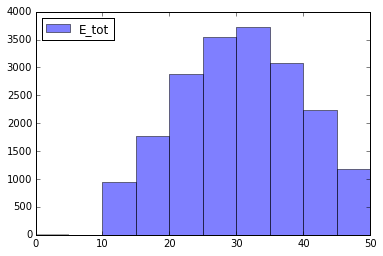

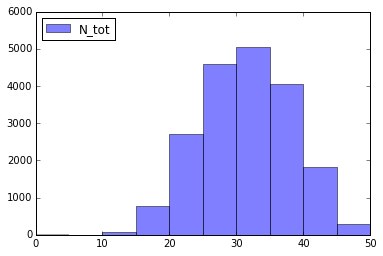

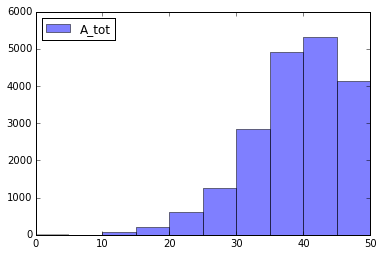

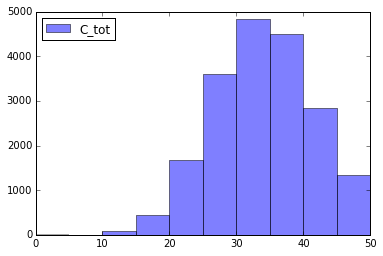

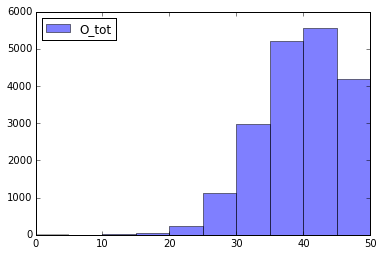

In [47]:
for t in totals:
    #plt.figure(figsize=(8,8))
    plt.hist(df[t], bins=b, alpha=0.5, label=t)
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0, 51, 10))
    plt.show()

### Gender

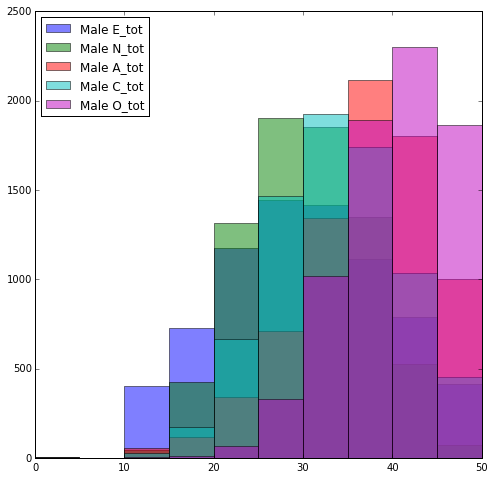

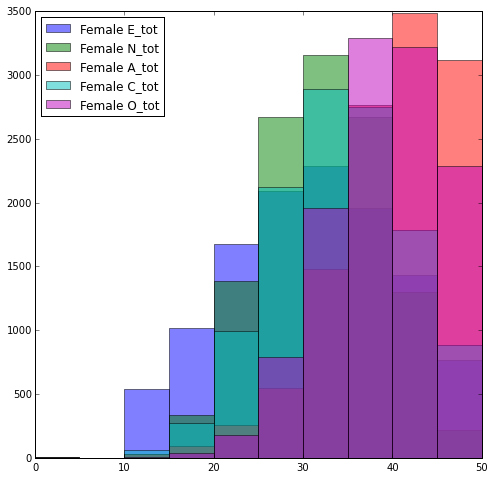

In [48]:
plt.figure(figsize=(8,8))
for t in totals:
    plt.hist(dfm[t], bins=b, alpha=0.5, label=('Male ' + t))
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 51, 10))
plt.show()
plt.figure(figsize=(8,8))
for t in totals:
    plt.hist(dff[t].values, bins=b, alpha=0.5, label=('Female ' + t))
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 51, 10))
plt.show()

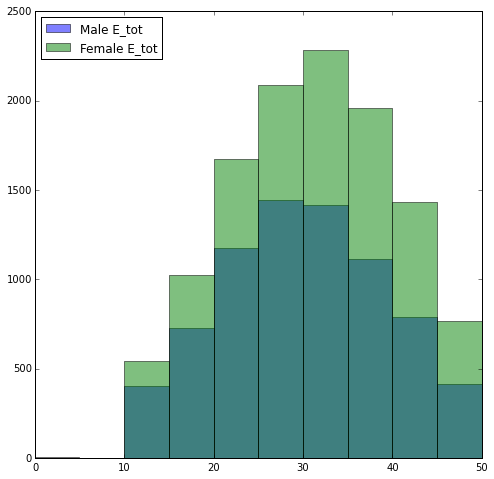

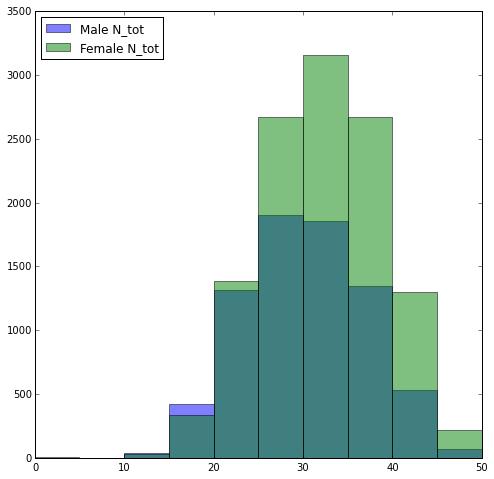

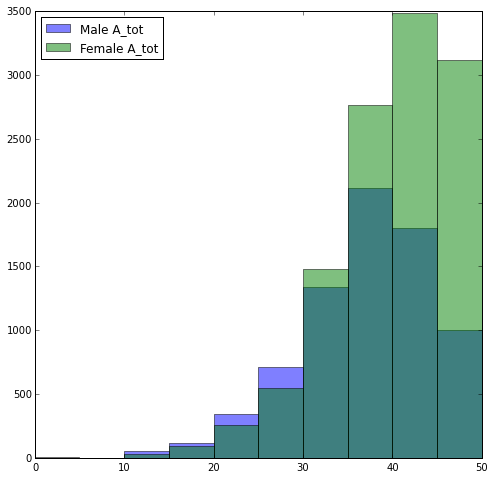

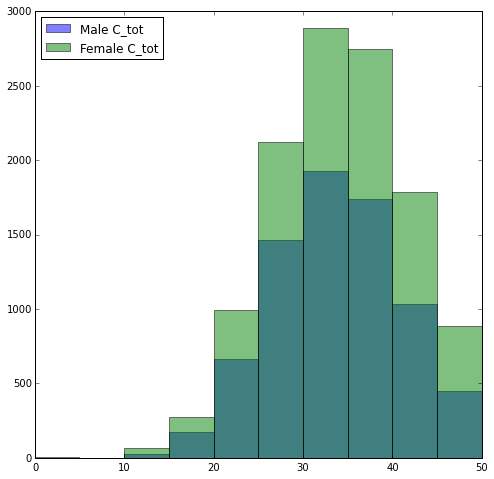

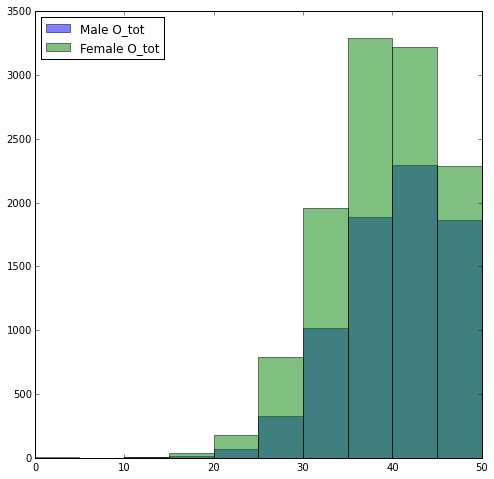

In [49]:
for t in totals:
    plt.figure(figsize=(8,8))
    plt.hist(dfm[t], bins=b, alpha=0.5, label=('Male ' + t))
    plt.hist(dff[t].values, bins=b, alpha=0.5, label=('Female ' + t))
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0, 51, 10))
    plt.show()

In [121]:
#Curiosity
for t in totals:
    t_val, p_val = stats.ttest_ind(dfm[t],dff[t])
    print t, ': ', 't-Value =', t_val, ' p-Value =', p_val

E_tot :  t-Value = -6.91138938814  p-Value = 4.94946554145e-12
N_tot :  t-Value = -19.8901994127  p-Value = 3.71229261978e-87
A_tot :  t-Value = -30.2108869503  p-Value = 6.25593905361e-196
C_tot :  t-Value = -4.12562124251  p-Value = 3.71288941848e-05
O_tot :  t-Value = 14.1889265507  p-Value = 1.81895346939e-45


### Ages

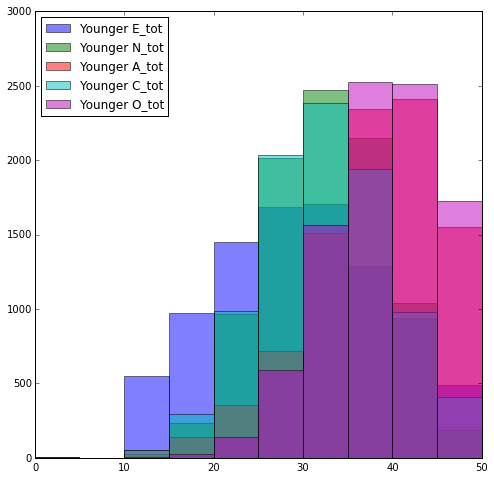

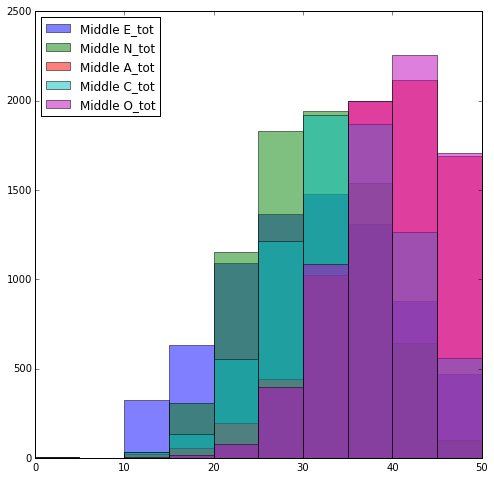

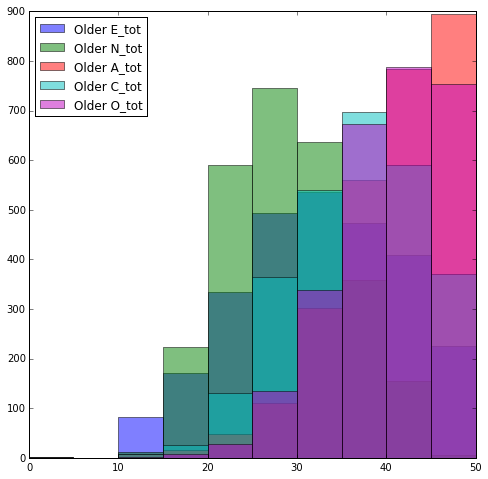

In [50]:
plt.figure(figsize=(8,8))
for t in totals:
    plt.hist(df_y[t].values, bins=b, alpha=0.5, label=('Younger ' + t))
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 51, 10))
plt.show()

plt.figure(figsize=(8,8))
for t in totals:
    plt.hist(df_m[t].values, bins=b, alpha=0.5, label=('Middle ' + t))
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 51, 10))
plt.show()

plt.figure(figsize=(8,8))
for t in totals:
    plt.hist(df_o[t].values, bins=b, alpha=0.5, label=('Older ' + t))
plt.legend(loc='upper left')
plt.xticks(np.arange(0, 51, 10))
plt.show()

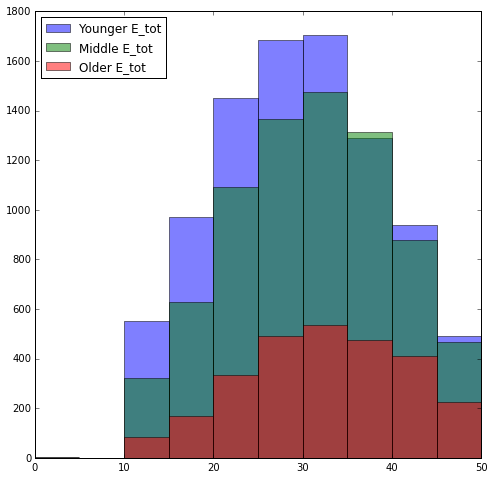

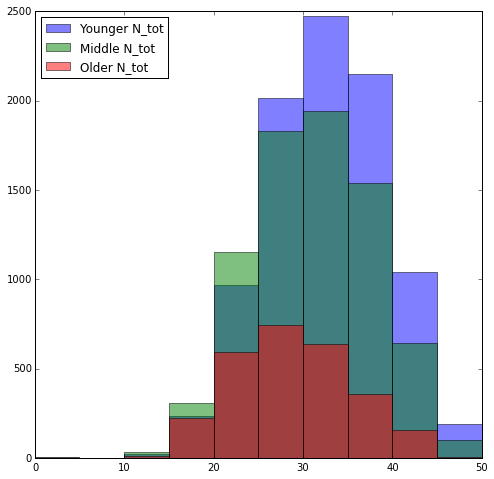

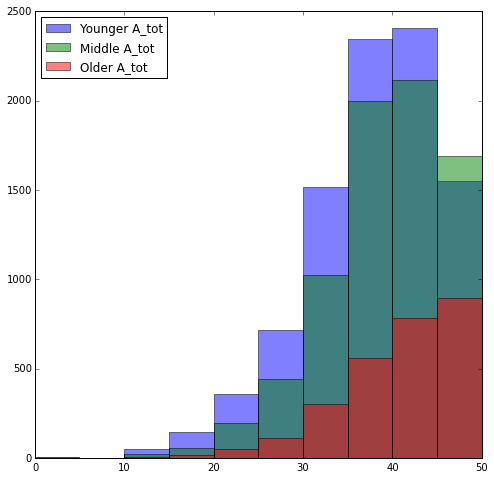

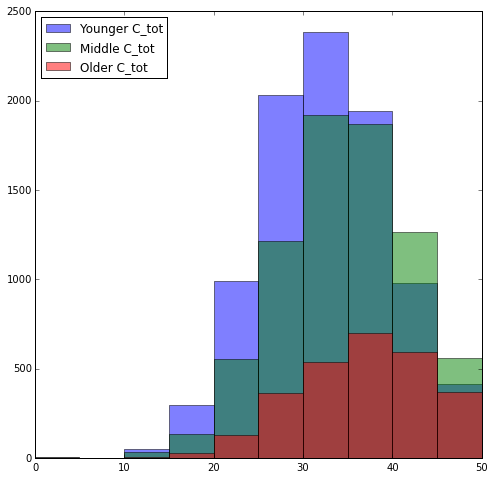

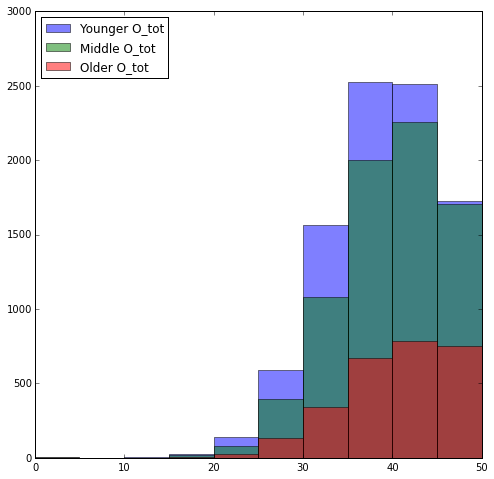

In [51]:
for t in totals:
    plt.figure(figsize=(8,8))
    plt.hist(df_y[t].values, bins=b, alpha=0.5, label=('Younger ' + t))
    plt.hist(df_m[t].values, bins=b, alpha=0.5, label=('Middle ' + t))
    plt.hist(df_o[t].values, bins=b, alpha=0.5, label=('Older ' + t))
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0, 51, 10))
    plt.show()

In [115]:
#More for curiosity since ANOVA assumptions may not be met
for t in totals:
    F, p_val = stats.f_oneway(df_y[t],df_m[t],df_o[t])
    print t, ': ', 'F-Value =', F, ' P-Value =', p_val

E_tot :  F-Value = 105.388351245  P-Value = 3.00577491361e-46
N_tot :  F-Value = 325.704063442  P-Value = 7.54776822155e-140
A_tot :  F-Value = 221.396326674  P-Value = 8.56343221063e-96
C_tot :  F-Value = 433.848496951  P-Value = 4.84356644714e-185
O_tot :  F-Value = 74.64575321  P-Value = 5.08400451918e-33


### US vs. World

In [52]:
df_us = df[df.country == 'US']
df_other = df[df.country != 'US'].drop(['country'],axis=1)
c = []
for i in range(0,len(df_other)):
    c.append('World')
df_other.insert(3,'country',c)

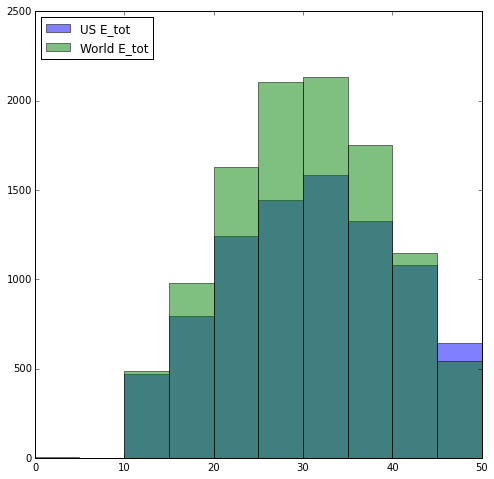

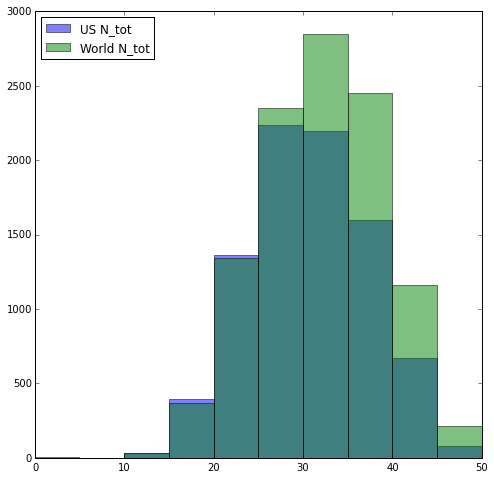

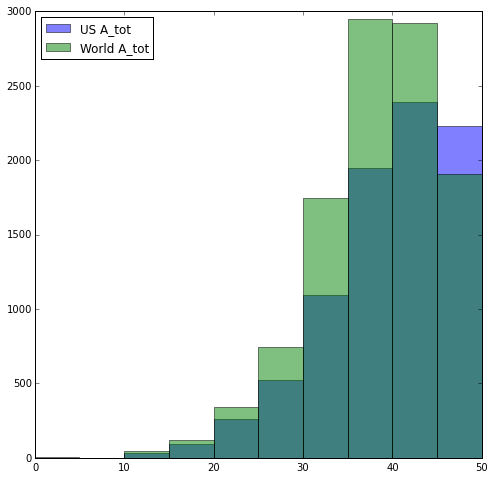

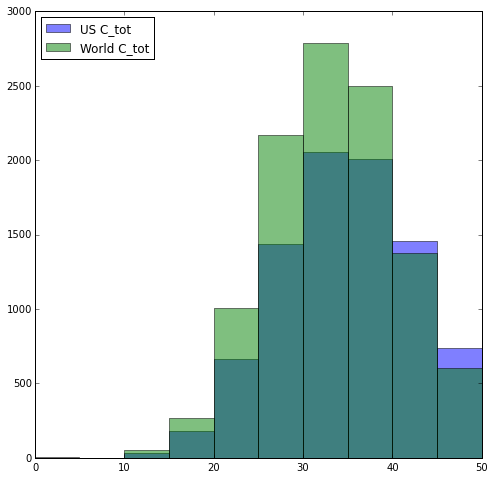

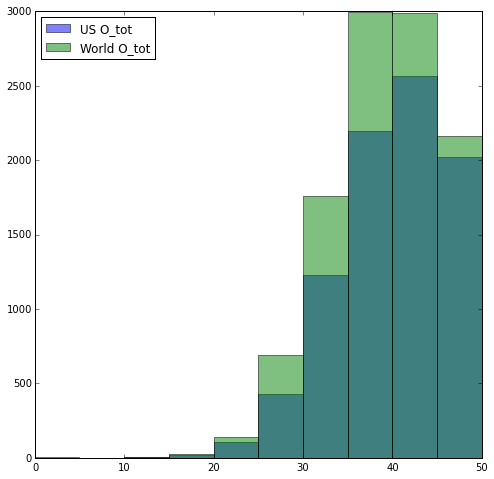

In [53]:
for t in totals:
    plt.figure(figsize=(8,8))
    plt.hist(df_us[t].values, bins=b, alpha=0.5, label=('US ' + t))
    plt.hist(df_other[t].values, bins=b, alpha=0.5, label=('World ' + t))
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0, 51, 10))
    plt.show()

### Races

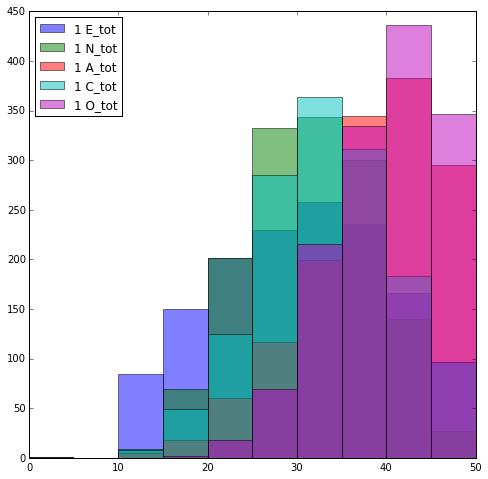

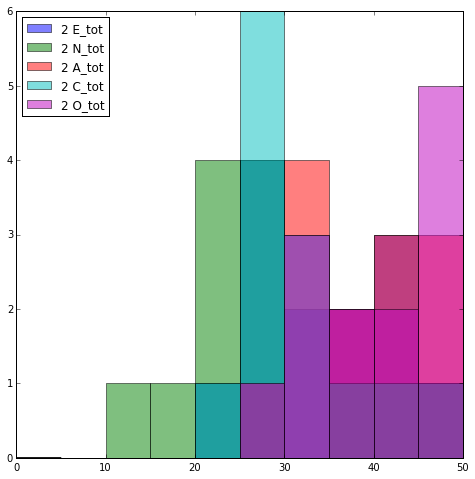

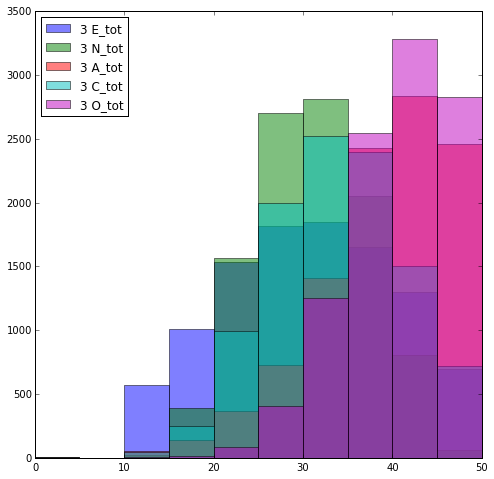

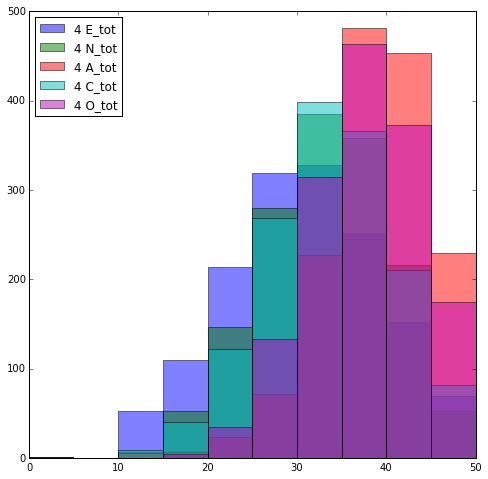

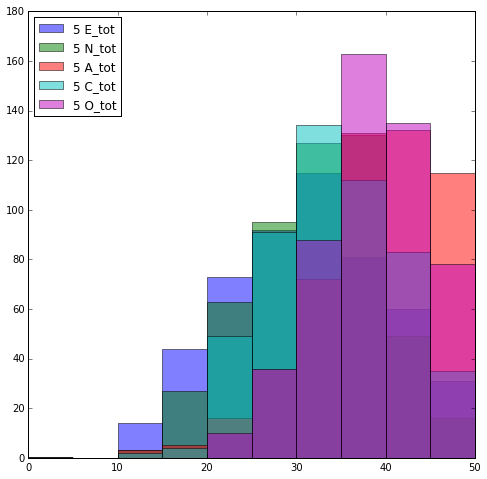

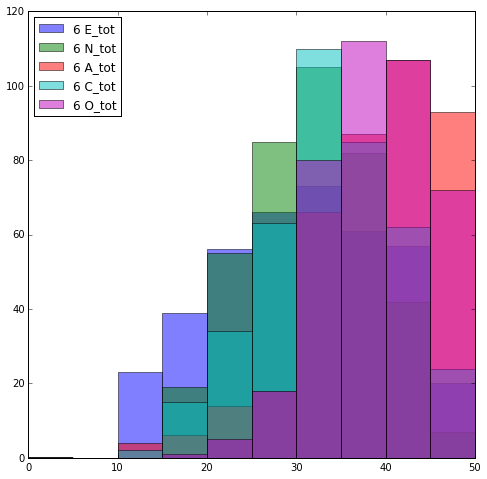

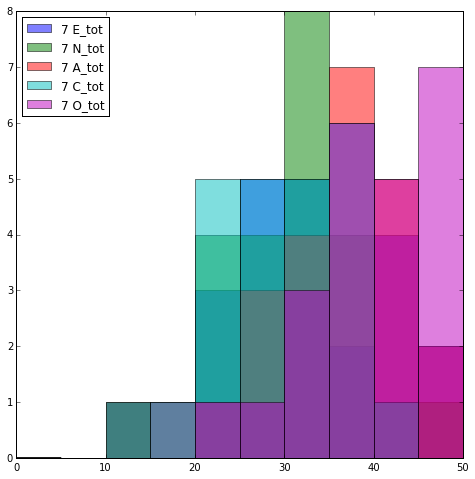

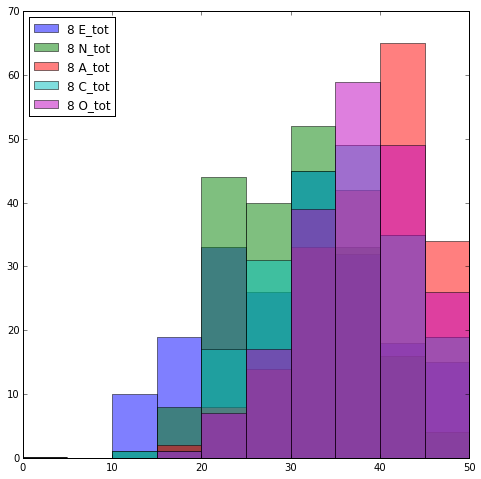

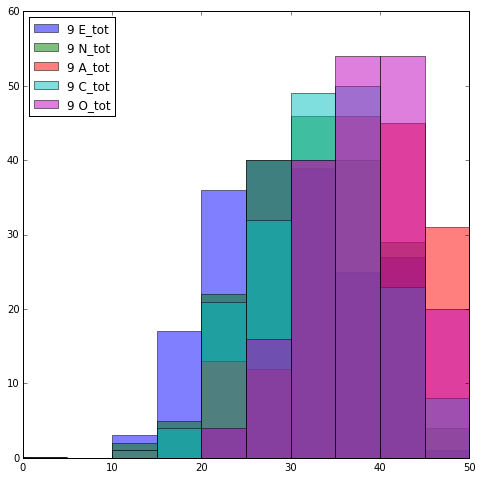

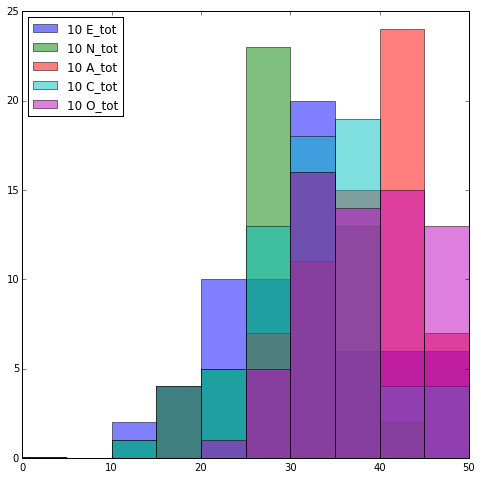

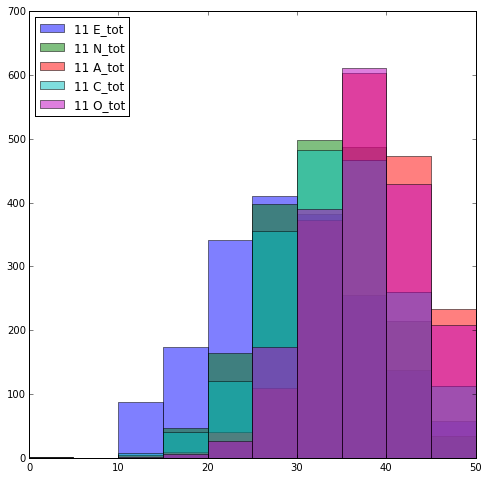

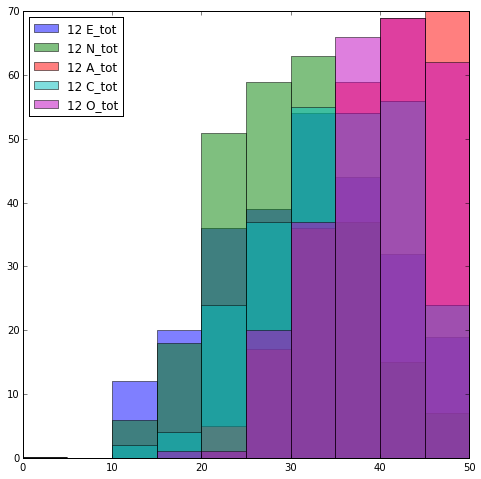

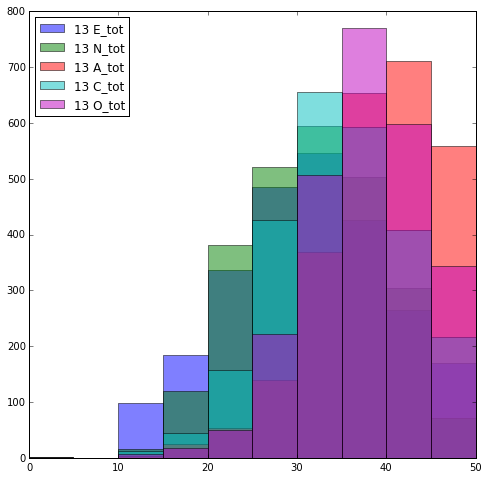

In [81]:
for r in races:
    plt.figure(figsize=(8,8))
    plt.hist(dr[r][totals[0]].values, bins=b, alpha=0.5, label=(str(r) + ' ' + totals[0]))
    plt.hist(dr[r][totals[1]].values, bins=b, alpha=0.5, label=(str(r) + ' ' + totals[1]))
    plt.hist(dr[r][totals[2]].values, bins=b, alpha=0.5, label=(str(r) + ' ' + totals[2]))
    plt.hist(dr[r][totals[3]].values, bins=b, alpha=0.5, label=(str(r) + ' ' + totals[3]))
    plt.hist(dr[r][totals[4]].values, bins=b, alpha=0.5, label=(str(r) + ' ' + totals[4]))
    plt.legend(loc='upper left')
    plt.xticks(np.arange(0, 51, 10))
    plt.show()

In [82]:
race_means = []
for t in totals:
    for r in races:
        race_means.append(dr[r][t].mean())

In [83]:
race_E_means = race_means[:13]
race_N_means = race_means[13:26]
race_A_means = race_means[26:39]
race_C_means = race_means[39:52]
race_O_means = race_means[52:]

In [84]:
x = range(1,14)
#x_labels = ['All','Male','Female','Young','Middle','Older','US','World']
y = [race_E_means,race_N_means,race_A_means,race_C_means,race_O_means]
colors = ['r','b','g','y','k']

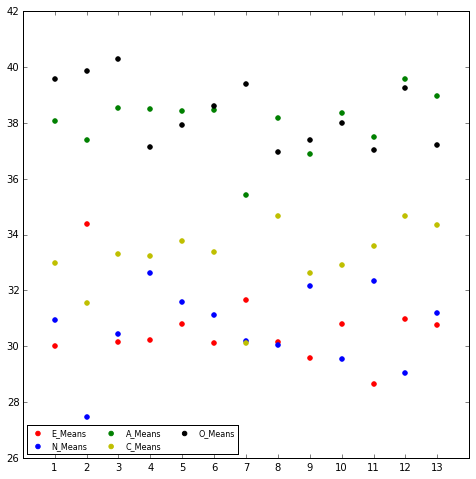

In [90]:
#Legend idea from http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
plt.figure(figsize=(8,8))

e = plt.scatter(x, y[0], marker='o', color=colors[0])
n = plt.scatter(x, y[1], marker='o', color=colors[1])
a  = plt.scatter(x, y[2], marker='o', color=colors[2])
c  = plt.scatter(x, y[3], marker='o', color=colors[3])
o  = plt.scatter(x, y[4], marker='o', color=colors[4])

plt.legend((e, n, a, c, o),
           ('E_Means', 'N_Means', 'A_Means', 'C_Means', 'O_Means'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.xticks(x, range(1,14))

plt.show()

In [118]:
#Unequal variances
for t in totals:
    F, p = stats.f_oneway(dr[1][t],dr[2][t],dr[3][t],dr[4][t],dr[5][t],dr[6][t],
                          dr[7][t],dr[8][t],dr[9][t],dr[10][t],dr[11][t],dr[12][t],dr[13][t])
    print t, ': ', 'F-Value =', F, ' P-Value =', p_val

E_tot :  F-Value = 5.75772655511  P-Value = 5.08400451918e-33
N_tot :  F-Value = 23.2903659826  P-Value = 5.08400451918e-33
A_tot :  F-Value = 5.97669714412  P-Value = 5.08400451918e-33
C_tot :  F-Value = 5.9306759373  P-Value = 5.08400451918e-33
O_tot :  F-Value = 89.5143213702  P-Value = 5.08400451918e-33


### Countries

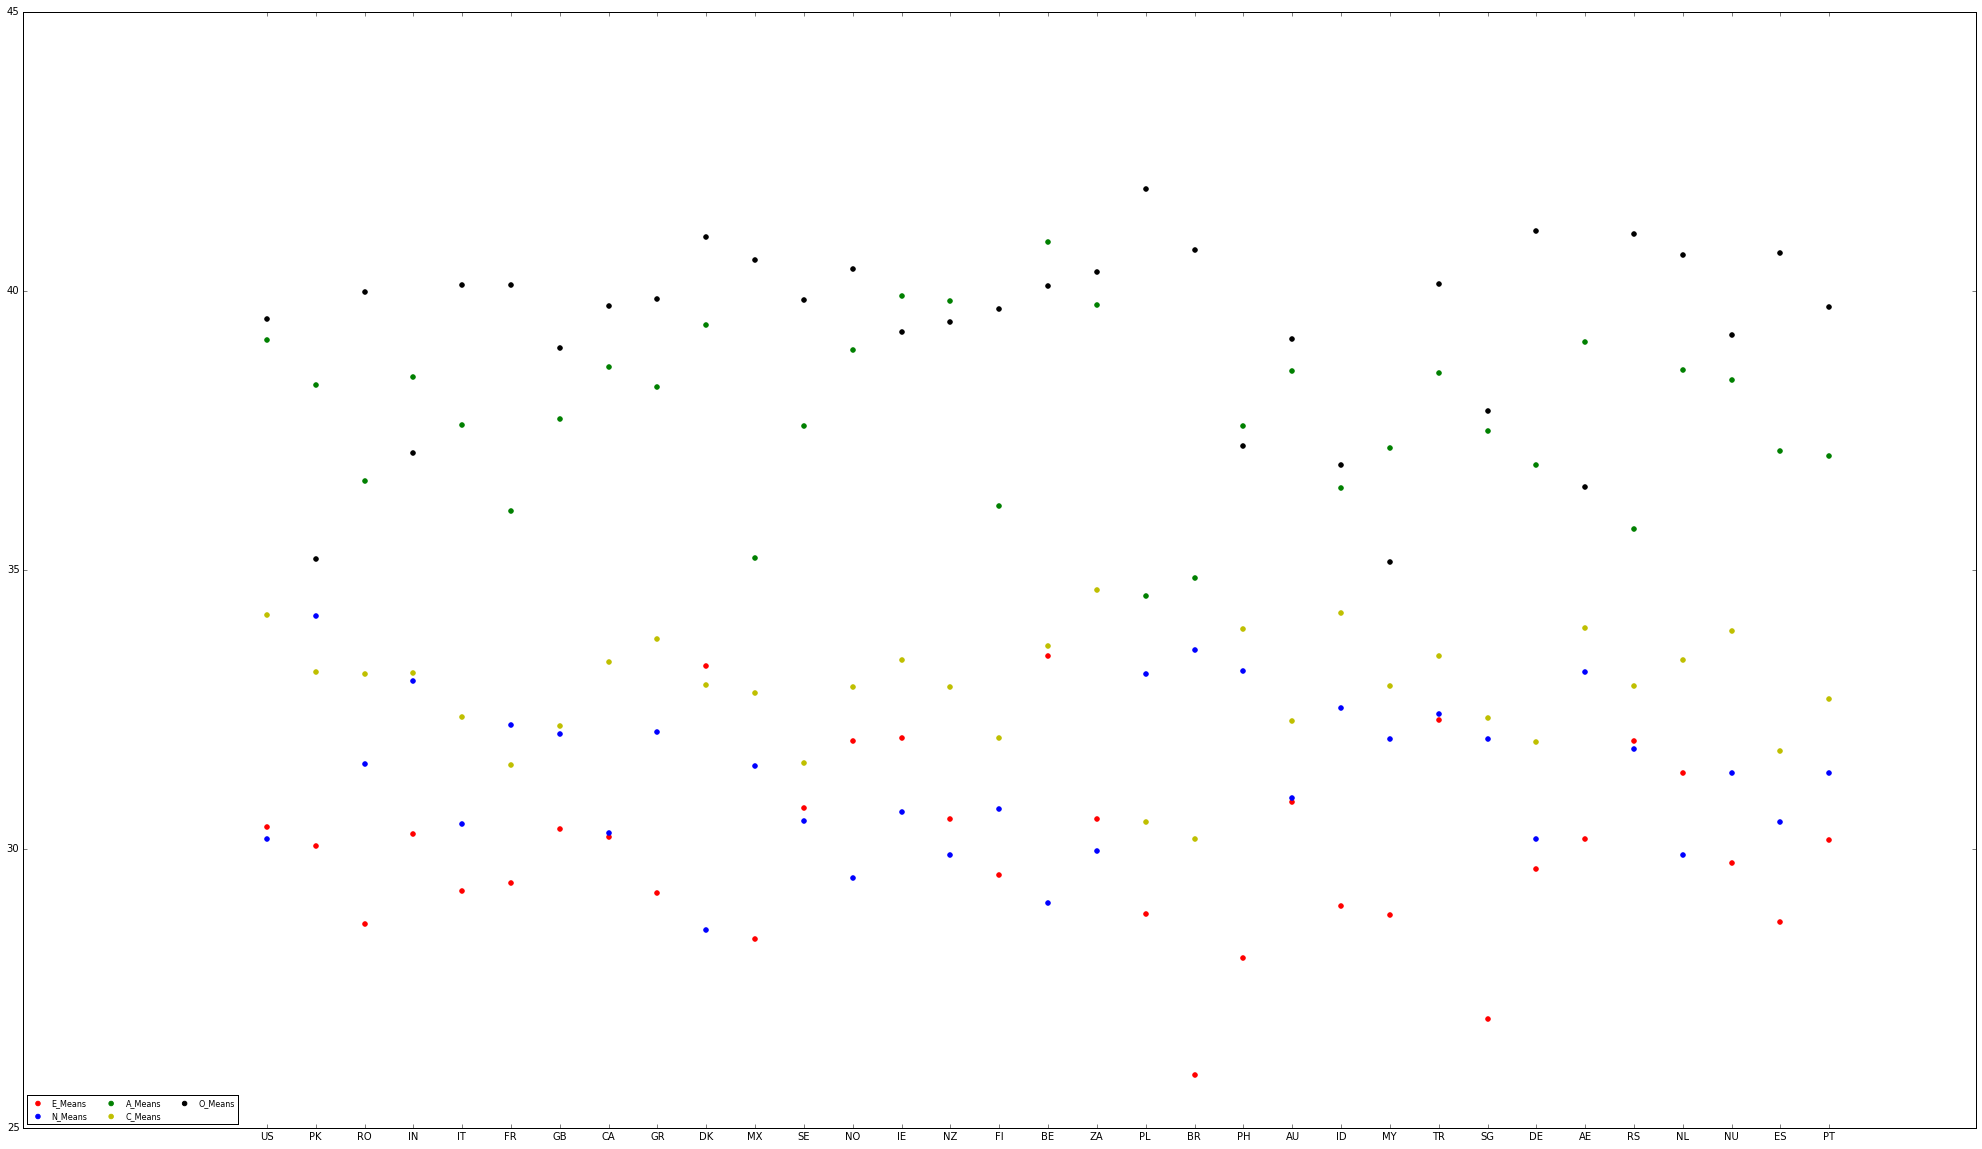

In [97]:
country_means = []
for t in totals:
    for c in countries:
        country_means.append(dc[c][t].mean())

co_E_means = country_means[:33]
co_N_means = country_means[33:66]
co_A_means = country_means[66:99]
co_C_means = country_means[99:132]
co_O_means = country_means[132:]

x = range(0,33)
x_labels = countries
y = [co_E_means,co_N_means,co_A_means,co_C_means,co_O_means]
colors = ['r','b','g','y','k']

#Legend idea from http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
plt.figure(figsize=(35,20))

e = plt.scatter(x, y[0], marker='o', color=colors[0])
n = plt.scatter(x, y[1], marker='o', color=colors[1])
a  = plt.scatter(x, y[2], marker='o', color=colors[2])
c  = plt.scatter(x, y[3], marker='o', color=colors[3])
o  = plt.scatter(x, y[4], marker='o', color=colors[4])

plt.legend((e, n, a, c, o),
           ('E_Means', 'N_Means', 'A_Means', 'C_Means', 'O_Means'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.xticks(x, x_labels)

plt.show()

In [98]:
#for co in countries:
#    plt.figure(figsize=(8,8))
#    plt.hist(dc[co][totals[0]].values, bins=b, alpha=0.5, label=(co + ' ' + totals[0]))
#    plt.hist(dc[co][totals[1]].values, bins=b, alpha=0.5, label=(co + ' ' + totals[1]))
#    plt.hist(dc[co][totals[2]].values, bins=b, alpha=0.5, label=(co + ' ' + totals[2]))
#    plt.hist(dc[co][totals[3]].values, bins=b, alpha=0.5, label=(co + ' ' + totals[3]))
#    plt.hist(dc[co][totals[4]].values, bins=b, alpha=0.5, label=(co + ' ' + totals[4]))
#    plt.legend(loc='upper left')
#    plt.xticks(np.arange(0, 51, 10))
#    plt.show()

### Group Comparisons

In [145]:
tot = []
for t in totals:
    tot.append(df[t].mean())
    tot.append(dfm[t].mean())
    tot.append(dff[t].mean())
    tot.append(df_y[t].mean())
    tot.append(df_m[t].mean())
    tot.append(df_o[t].mean())
    tot.append(df_us[t].mean())
    tot.append(df_other[t].mean()) 

In [112]:
E_means = tot[:8]
N_means = tot[8:16]
A_means = tot[16:24]
C_means = tot[24:32]
O_means = tot[32:]

In [113]:
x = range(0,8)
x_labels = ['All','Male','Female','Young','Middle','Older','US','World']
y = [E_means,N_means,A_means,C_means,O_means]
colors = ['r','b','g','y','k']

In [114]:
means = []
for j in y:
    means.append(j)

In [115]:
df_means = pd.DataFrame()
df_means.insert(0,'Means',means)

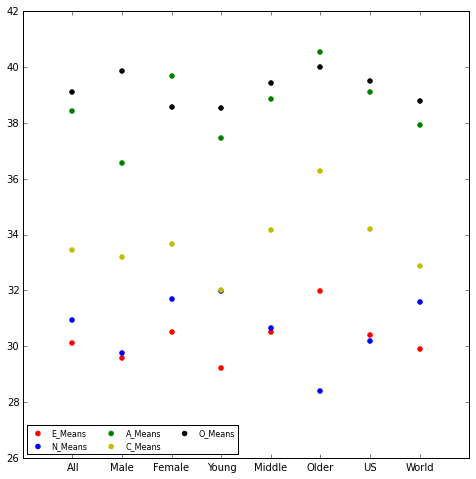

In [116]:
#Legend idea from http://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend
plt.figure(figsize=(8,8))

e = plt.scatter(x, y[0], marker='o', color=colors[0])
n = plt.scatter(x, y[1], marker='o', color=colors[1])
a  = plt.scatter(x, y[2], marker='o', color=colors[2])
c  = plt.scatter(x, y[3], marker='o', color=colors[3])
o  = plt.scatter(x, y[4], marker='o', color=colors[4])

plt.legend((e, n, a, c, o),
           ('E_Means', 'N_Means', 'A_Means', 'C_Means', 'O_Means'),
           scatterpoints=1,
           loc='lower left',
           ncol=3,
           fontsize=8)

plt.xticks(x, x_labels)

plt.show()

In [117]:
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(means)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [118]:
df_means['Cluster'] = kmeans_model.labels_

In [119]:
df_means.rename(index={0: 'E'},inplace=True)
df_means.rename(index={1: 'N'},inplace=True)
df_means.rename(index={2: 'A'},inplace=True)
df_means.rename(index={3: 'C'},inplace=True)
df_means.rename(index={4: 'O'},inplace=True)

In [120]:
df_means

,Means,Cluster
E,"[30.1145795648, 29.5698436038, 30.5101087326, ...",0
N,"[30.9554498941, 29.7516374816, 31.7059972817, ...",0
A,"[38.4461729288, 36.5574121107, 39.670829086, 3...",1
C,"[33.463073027, 33.2019783451, 33.6473836222, 3...",0
O,"[39.0961806812, 39.8815666355, 38.5766224941, ...",1


# Predictions

In [121]:
### Grid Search
n_estimators = [50,100,300,400,500,1000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [3,5,7]


rfc = RandomForestClassifier(n_jobs=1)
rfr = RandomForestRegressor(n_jobs=1)
model_r = GridSearchCV(rfr,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)
model_c = GridSearchCV(rfc,
                         dict(n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [83]:
y_age = df_age.pop("age")
y_race = df_race.pop("race")
y_engnat = df_engnat.pop("engnat")
y_hand = df_hand.pop("hand")
y_gender = df_gender.pop("gender")

### Age

In [126]:
X_train, X_test, y_train, y_test = train_test_split(df_age, y_age, test_size=.2, random_state=42)
model_r.fit(X_train, y_train)
best_rf = model_r.best_estimator_

In [127]:
print 'Age Predictions'
print 'RMSE: ',sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
print 'R2: ',r2_score(y_test, best_rf.predict(X_test))

Age Predictions
RMSE:  10.4422028188
R2:  0.17151298784


C8: I shirk my duties.

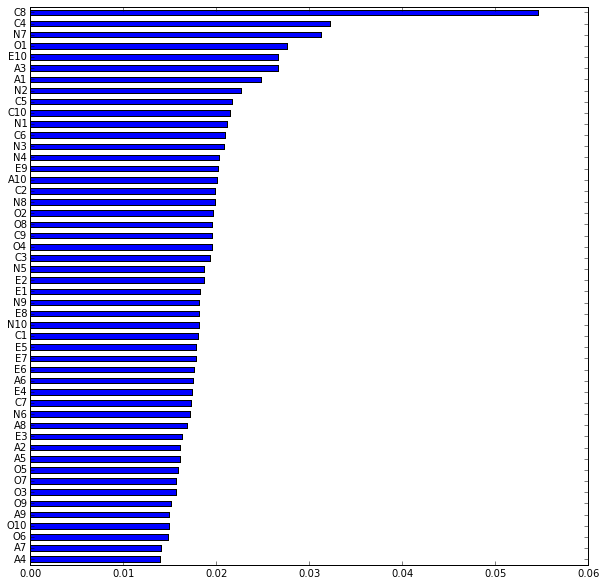

In [128]:
feature_importances = pd.Series(best_rf.feature_importances_, index=df_age.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,10));

In [129]:
scores = cross_validation.cross_val_score(best_rf, df_age, y_age, cv=10)

In [130]:
scores

array([ 0.19666913,  0.19517681,  0.19604471,  0.21022305,  0.18228765,
        0.19378559,  0.17734863,  0.16072368,  0.1636457 ,  0.19774241])

In [131]:
scores.mean()

0.18736473431978523

### Race

In [132]:
X_train, X_test, y_train, y_test = train_test_split(df_race, y_race, test_size=.2, random_state=42)
model_c.fit(X_train, y_train)
best_rf = model_c.best_estimator_

In [133]:
print 'Race Predictions'
print 'RMSE: ',sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
print 'R2: ',r2_score(y_test, best_rf.predict(X_test))

Race Predictions
RMSE:  4.51488629933
R2:  -0.311475269489


O8: I use difficult words.
O1: I have a rich vocabulary.
A1: I feel little concern for others.

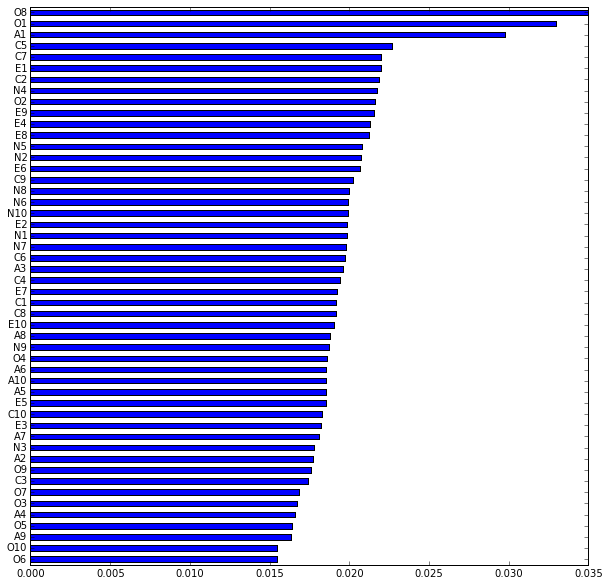

In [134]:
feature_importances = pd.Series(best_rf.feature_importances_, index=df_race.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,10));

In [135]:
scores = cross_validation.cross_val_score(best_rf, df_race, y_race, cv=10)

In [136]:
scores

array([ 0.5561277 ,  0.54994851,  0.5561277 ,  0.55750387,  0.5580795 ,
        0.55113636,  0.55871702,  0.54578376,  0.54842051,  0.55544041])

In [137]:
predicted = cross_validation.cross_val_predict(best_rf, df_race, y_race, cv=10)
metrics.accuracy_score(y_race, predicted)

0.55512522592305702

### Gender

In [138]:
X_train, X_test, y_train, y_test = train_test_split(df_gender, y_gender, test_size=.2, random_state=42)
model_c.fit(X_train, y_train)
best_rf = model_c.best_estimator_

In [139]:
print 'Gender Predictions'
print 'RMSE: ',sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
print 'R2: ',r2_score(y_test, best_rf.predict(X_test))

Gender Predictions
RMSE:  0.569016709326
R2:  -0.304689178967


N1: I get stressed out easily.
N2: I am relaxed most of the time.

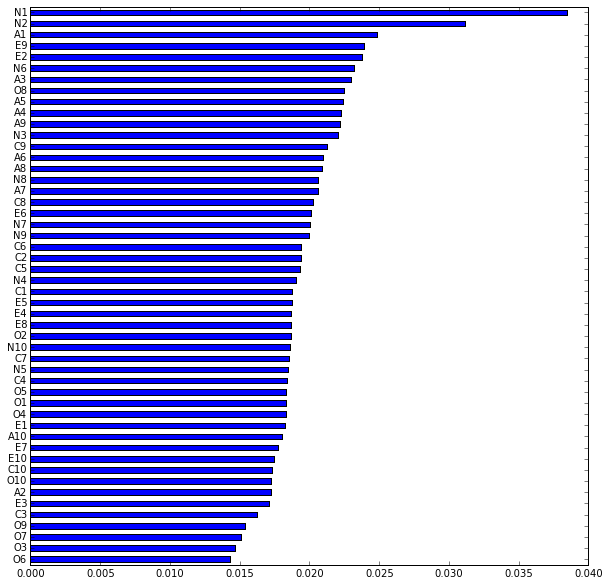

In [140]:
feature_importances = pd.Series(best_rf.feature_importances_, index=df_gender.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,10));

In [141]:
scores = cross_validation.cross_val_score(best_rf, df_gender, y_gender, cv=10)

In [142]:
scores

array([ 0.67337461,  0.68559628,  0.67733609,  0.70160041,  0.68869386,
        0.67010842,  0.67407025,  0.65237603,  0.6997416 ,  0.69302326])

In [143]:
predicted = cross_validation.cross_val_predict(best_rf, df_gender, y_gender, cv=10)
metrics.accuracy_score(y_gender, predicted)

0.68443067389620449

### Engnat

In [144]:
X_train, X_test, y_train, y_test = train_test_split(df_engnat, y_engnat, test_size=.2, random_state=42)
model_c.fit(X_train, y_train)
best_rf = model_c.best_estimator_

In [145]:
print 'Engnat Predictions'
print 'RMSE: ',sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
print 'R2: ',r2_score(y_test, best_rf.predict(X_test))

Engnat Predictions
RMSE:  0.515697307424
R2:  -0.148685654063


A1: I feel little concern for others.

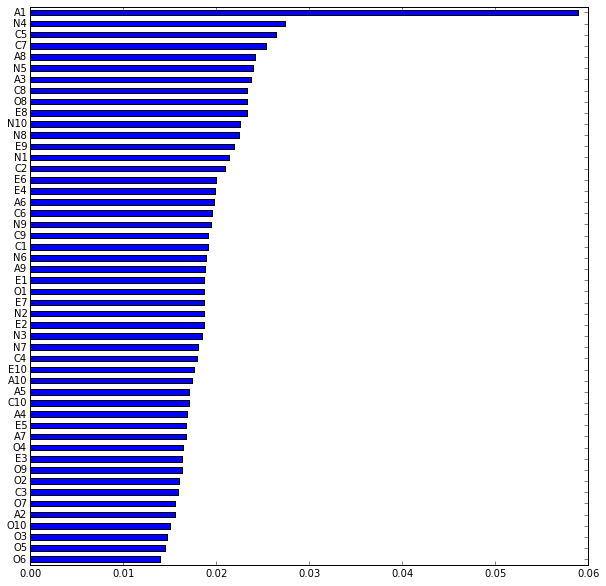

In [146]:
feature_importances = pd.Series(best_rf.feature_importances_, index=df_engnat.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,10));

In [147]:
scores = cross_validation.cross_val_score(best_rf, df_engnat, y_engnat, cv=10)

In [148]:
scores

array([ 0.73515746,  0.73722251,  0.73102736,  0.73618998,  0.73102736,
        0.73360867,  0.73309241,  0.74431818,  0.7245478 ,  0.72351421])

In [149]:
predicted = cross_validation.cross_val_predict(best_rf, df_engnat, y_engnat, cv=10)
metrics.accuracy_score(y_engnat, predicted)

0.73410792667183067

### Hand

In [151]:
X_train, X_test, y_train, y_test = train_test_split(df_hand, y_hand, test_size=.2, random_state=42)
model_c.fit(X_train, y_train)
best_rf = model_c.best_estimator_

In [152]:
print 'Hand Predictions'
print 'RMSE: ',sqrt(mean_squared_error(y_test, best_rf.predict(X_test)))
print 'R2: ',r2_score(y_test, best_rf.predict(X_test))

Hand Predictions
RMSE:  0.433850413455
R2:  -0.144884101153


All questions almost equally important.

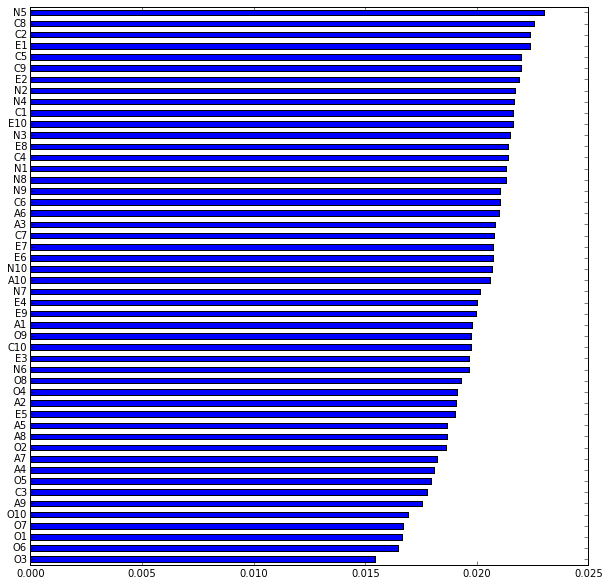

In [153]:
feature_importances = pd.Series(best_rf.feature_importances_, index=df_engnat.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(10,10));

In [154]:
scores = cross_validation.cross_val_score(best_rf, df_hand, y_hand, cv=10)

In [155]:
scores

array([ 0.88745483,  0.88797109,  0.88797109,  0.88797109,  0.88797109,
        0.88797109,  0.88842975,  0.88842975,  0.88842975,  0.88837209])

In [156]:
predicted = cross_validation.cross_val_predict(best_rf, df_hand, y_hand, cv=10)

In [157]:
metrics.accuracy_score(y_hand, predicted)

0.88814872192099148